# Housing Sales Prices Analysis of Verona: Guidelines for Investors.

# Import Libraries

In [2]:
import numpy as np 
from numpy import inf

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns
from scipy import stats

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 


import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import preprocessing

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0         conda-forge
    geopy:         1.20.0-py_0       conda-forge

The following p

# Import Master Dataset

In [3]:
data = pd.read_csv('MasterData_R.csv', sep=';')
data

,CAP,Neighborhood,Latitude,Longitude,Price,NTN,IMI,GdA,Trend Eval,Perception
0,37121,Centro,45.44177,10.99624,3700.0,0.041,0.0210,0.07,0.332,5
1,37122,Cittadella,45.43526,10.98936,2800.0,0.177,0.0247,0.07,0.281,5
2,37123,San Zeno,45.44113,10.98048,2500.0,0.177,0.0247,0.07,0.115,4
3,37124,Parona Pindemonte,45.46700,10.96454,2200.0,0.061,0.0248,0.07,0.025,3
4,37125,Quinzano,45.47207,10.97446,2000.0,0.115,0.0205,0.07,-0.031,3
5,37126,Borgo Trento,45.44873,10.98823,2600.0,-0.021,0.0248,0.07,0.045,4
6,37127,Avesa,45.47469,10.98902,1800.0,0.115,0.0205,0.07,-0.276,3
7,37128,Valdonega,45.45665,10.99970,2900.0,-0.032,0.0248,0.07,0.021,4
8,37129,Veronetta Ponte Pietra,45.44232,11.00559,2500.0,-0.239,0.0227,0.07,0.185,4
9,37131,Borgo Venezia Santa Croce,45.44478,11.02308,2000.0,-0.061,0.0246,0.07,0.142,3


# 1. Exploring GEO-Data and KClustering Section

In [4]:
bins= np.linspace(min(data['Price']),max(data['Price']), 6)
group_names= ['1', '2', '3', '4', '5']

data['Price_binned']=pd.cut(data['Price'], bins, labels=group_names, include_lowest=True)

In [5]:
bins= np.linspace(min(data['Price']),max(data['Price']), 6)
group_names= ['Very Low', 'Low', 'Medium', 'High', 'Very High']

data['Price_binned_val']=pd.cut(data['Price'], bins, labels=group_names, include_lowest=True)

In [6]:
data.head()

,CAP,Neighborhood,Latitude,Longitude,Price,NTN,IMI,GdA,Trend Eval,Perception,Price_binned,Price_binned_val
0,37121,Centro,45.44177,10.99624,3700.0,0.041,0.0210,0.07,0.332,5,5,Very High
1,37122,Cittadella,45.43526,10.98936,2800.0,0.177,0.0247,0.07,0.281,5,4,High
2,37123,San Zeno,45.44113,10.98048,2500.0,0.177,0.0247,0.07,0.115,4,3,Medium
3,37124,Parona Pindemonte,45.46700,10.96454,2200.0,0.061,0.0248,0.07,0.025,3,2,Low
4,37125,Quinzano,45.47207,10.97446,2000.0,0.115,0.0205,0.07,-0.031,3,2,Low


In [7]:
dfd = data[['CAP','Neighborhood', 'Latitude', 'Longitude']]
dfd

,CAP,Neighborhood,Latitude,Longitude
0,37121,Centro,45.44177,10.99624
1,37122,Cittadella,45.43526,10.98936
2,37123,San Zeno,45.44113,10.98048
3,37124,Parona Pindemonte,45.46700,10.96454
4,37125,Quinzano,45.47207,10.97446
5,37126,Borgo Trento,45.44873,10.98823
6,37127,Avesa,45.47469,10.98902
7,37128,Valdonega,45.45665,10.99970
8,37129,Veronetta Ponte Pietra,45.44232,11.00559
9,37131,Borgo Venezia Santa Croce,45.44478,11.02308


In [8]:
Verona = dfd
Verona.head()

,CAP,Neighborhood,Latitude,Longitude
0,37121,Centro,45.44177,10.99624
1,37122,Cittadella,45.43526,10.98936
2,37123,San Zeno,45.44113,10.98048
3,37124,Parona Pindemonte,45.46700,10.96454
4,37125,Quinzano,45.47207,10.97446


In [9]:
address = 'Verona'

geolocator = Nominatim(user_agent="CA_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Verona are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Verona are 45.4384958, 10.9924122.


In [10]:
# create map of Verona using latitude and longitude values
map_Verona = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(Verona['Latitude'], Verona['Longitude'], Verona['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Verona)  
    
map_Verona

### Define Foursquare Credentials and Version

In [1]:
CLIENT_ID = '###############################' # your Foursquare ID
CLIENT_SECRET = '##########################################' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ###############################
CLIENT_SECRET:##########################################


### Explore Neighborhoods

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        LIMIT = 100 # limit of number of venues returned by Foursquare API

        radius = 750 # define radius
        
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Run the above function on each neighborhood

In [13]:
Verona_venues = getNearbyVenues(names=Verona['Neighborhood'],
                                   latitudes=Verona['Latitude'],
                                   longitudes=Verona['Longitude']
                                  )

Centro
Cittadella
San Zeno
Parona Pindemonte
Quinzano
Borgo Trento
Avesa
Valdonega
Veronetta Ponte Pietra
Borgo Venezia Santa Croce
San Michele
Porto San Pancrazio
Borgo Roma
Fiera ZAI
Golosine
Santa Lucia
Borgo Milano Borgo Nuovo
Chievo San Massimo
Montorio
Valpantena


In [14]:
print(Verona_venues.shape)
Verona_venues.head()

(538, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centro,45.44177,10.99624,Piazza delle Erbe,45.443066,10.997200,Plaza
1,Centro,45.44177,10.99624,Centro Storico Verona,45.442172,10.996009,Neighborhood
2,Centro,45.44177,10.99624,Torre dei Lamberti,45.442982,10.997921,Monument / Landmark
3,Centro,45.44177,10.99624,Caffè Borsari,45.443099,10.995708,Café
4,Centro,45.44177,10.99624,Osteria Del Bugiardo,45.443029,10.995590,Trattoria/Osteria


In [15]:
Verona_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Avesa,5,5,5,5,5,5
Borgo Milano Borgo Nuovo,33,33,33,33,33,33
Borgo Roma,12,12,12,12,12,12
Borgo Trento,36,36,36,36,36,36
Borgo Venezia Santa Croce,21,21,21,21,21,21
Centro,100,100,100,100,100,100
Chievo San Massimo,11,11,11,11,11,11
Cittadella,96,96,96,96,96,96
Fiera ZAI,6,6,6,6,6,6


In [16]:
print('There are {} uniques categories.'.format(len(Verona_venues['Venue Category'].unique())))

There are 115 uniques categories.


### Graph Number of Venues in Each Cluster

In [17]:
Verona_databar = Verona_venues.groupby('Neighborhood').count()
Verona_databar

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Avesa,5,5,5,5,5,5
Borgo Milano Borgo Nuovo,33,33,33,33,33,33
Borgo Roma,12,12,12,12,12,12
Borgo Trento,36,36,36,36,36,36
Borgo Venezia Santa Croce,21,21,21,21,21,21
Centro,100,100,100,100,100,100
Chievo San Massimo,11,11,11,11,11,11
Cittadella,96,96,96,96,96,96
Fiera ZAI,6,6,6,6,6,6


In [18]:
Verona_databar_ref = Verona_databar[Verona_databar.columns[2:3]]
Verona_databar_ref 

,Venue
Neighborhood,
Avesa,5
Borgo Milano Borgo Nuovo,33
Borgo Roma,12
Borgo Trento,36
Borgo Venezia Santa Croce,21
Centro,100
Chievo San Massimo,11
Cittadella,96
Fiera ZAI,6


In [19]:
Verona_databar_refined = Verona_databar_ref.sort_values(by=['Venue'], ascending=True)

In [20]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


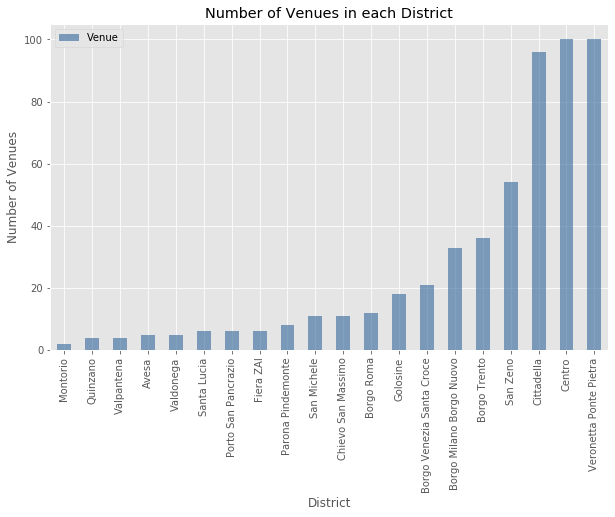

In [21]:
# step 2: plot data
Verona_databar_refined.plot(kind='bar', figsize=(10, 6), color = (0.2, 0.4, 0.6, 0.6))

plt.xlabel('District') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Number of Venues in each District') # add title to the plot

plt.show()

# Analyze Each Neighborhood

In [22]:
# one hot encoding
Verona_onehot = pd.get_dummies(Verona_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Verona_onehot['Neighborhood'] = Verona_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Verona_onehot.columns[-1]] + list(Verona_onehot.columns[:-1])
Verona_onehot = Verona_onehot[fixed_columns]

Verona_onehot.head()

,Winery,Adult Education Center,American Restaurant,Argentinian Restaurant,Art Gallery,Athletics & Sports,Bakery,Bar,Bed & Breakfast,Beer Bar,Board Shop,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Burger Joint,Bus Station,Café,Campanian Restaurant,Castle,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cupcake Shop,Dance Studio,Dessert Shop,Diner,Dog Run,Donut Shop,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Fountain,Fruit & Vegetable Store,Garden,Gas Station,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hobby Shop,Home Service,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Kids Store,Locksmith,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Neighborhood,Nightclub,Park,Pet Store,Pharmacy,Piadineria,Pizza Place,Playground,Plaza,Pool,Print Shop,Pub,Restaurant,Road,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Spanish Restaurant,Stadium,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Stadium,Theater,Toy / Game Store,Trail,Train Station,Trattoria/Osteria,Udon Restaurant,Vegetarian / Vegan Restaurant,Veneto Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Centro,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [23]:
Verona_onehot.shape

(538, 115)

### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [24]:
Verona_grouped = Verona_onehot.groupby('Neighborhood').mean().reset_index()
Verona_grouped

,Neighborhood,Winery,Adult Education Center,American Restaurant,Argentinian Restaurant,Art Gallery,Athletics & Sports,Bakery,Bar,Bed & Breakfast,Beer Bar,Board Shop,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Burger Joint,Bus Station,Café,Campanian Restaurant,Castle,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cupcake Shop,Dance Studio,Dessert Shop,Diner,Dog Run,Donut Shop,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Fountain,Fruit & Vegetable Store,Garden,Gas Station,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hobby Shop,Home Service,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Kids Store,Locksmith,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Nightclub,Park,Pet Store,Pharmacy,Piadineria,Pizza Place,Playground,Plaza,Pool,Print Shop,Pub,Restaurant,Road,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Spanish Restaurant,Stadium,Supermarket,Sushi Restaurant,Tapas Restaurant,Tennis Stadium,Theater,Toy / Game Store,Trail,Train Station,Trattoria/Osteria,Udon Restaurant,Vegetarian / Vegan Restaurant,Veneto Restaurant,Wine Bar,Wine Shop
0,Avesa,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.200000,0.0,0.200000,0.000000,0.000000,0.000000,0.200000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000
1,Borgo Milano Borgo Nuovo,0.000000,0.030303,0.030303,0.0,0.000000,0.060606,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.00,0.000000,0.00,0.030303,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.060606,0.030303,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.00,0.030303,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.030303,0.00,0.121212,0.00,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.00,0.000000,0.000000,0.030303,0.000000,0.00,0.121212,0.0,0.000000,0.000000,0.000000,0.030303,0.030303,0.00,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.030303,0.030303,0.00,0.060606,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.00,0.030303,0.000
2,Borgo Roma,0.000000,0.000000,0.083333,0.0,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.083333,0.000000,0.000000,0.00,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.083333,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0

### Print each neighborhood along with the top 5 most common venues

In [25]:
num_top_venues = 5

for hood in Verona_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Verona_grouped[Verona_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Avesa----
                venue  freq
0  Italian Restaurant   0.4
1          Restaurant   0.2
2               Plaza   0.2
3         Pizza Place   0.2
4              Winery   0.0


----Borgo Milano Borgo Nuovo----
                venue  freq
0         Pizza Place  0.12
1               Hotel  0.12
2  Athletics & Sports  0.06
3        Cupcake Shop  0.06
4             Stadium  0.06


----Borgo Roma----
                  venue  freq
0            Restaurant  0.08
1     Mobile Phone Shop  0.08
2  Fast Food Restaurant  0.08
3           Pizza Place  0.08
4                  Park  0.08


----Borgo Trento----
            venue  freq
0            Café  0.14
1           Plaza  0.11
2        Wine Bar  0.08
3     Pizza Place  0.08
4  Ice Cream Shop  0.08


----Borgo Venezia Santa Croce----
                venue  freq
0         Pizza Place  0.19
1                Café  0.10
2  Chinese Restaurant  0.10
3      Ice Cream Shop  0.05
4           Multiplex  0.05


----Centro----
                venue  fre

### Put that into a pandas dataframe

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Verona_grouped['Neighborhood']

for ind in np.arange(Verona_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Verona_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Avesa,Italian Restaurant,Pizza Place,Restaurant,Plaza,Wine Shop,Flower Shop,Cupcake Shop,Dance Studio,Dessert Shop,Diner
1,Borgo Milano Borgo Nuovo,Pizza Place,Hotel,Athletics & Sports,Cupcake Shop,Stadium,Soccer Field,Motel,Pet Store,Chinese Restaurant,Pub
2,Borgo Roma,Ice Cream Shop,Gym,Pizza Place,Fast Food Restaurant,Café,Bar,Restaurant,Italian Restaurant,Park,American Restaurant
3,Borgo Trento,Café,Plaza,Ice Cream Shop,Wine Bar,Pizza Place,Hotel,Italian Restaurant,Trattoria/Osteria,Breakfast Spot,Park
4,Borgo Venezia Santa Croce,Pizza Place,Chinese Restaurant,Café,Ice Cream Shop,Smoke Shop,Wine Bar,Food & Drink Shop,Multiplex,Dog Run,Park


In [30]:
Verona_grouped_clustering = Verona_grouped.drop('Neighborhood', 1)

# Determine the best K

In [31]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Plot Elbow Method for Optimal K

In [32]:
sum_of_squared_distances=[]
K= range(1, 21)

for k in K:
    print(k, end=' ')
    kmeans=KMeans(n_clusters=k).fit(Verona_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

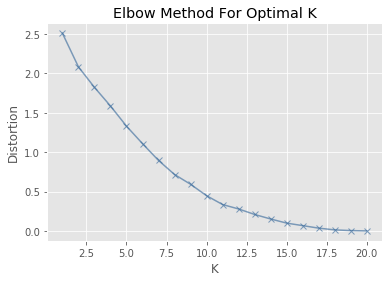

In [33]:
plt.plot(K, sum_of_squared_distances,'bx-', color = (0.2, 0.4, 0.6, 0.6))

plt.ylabel('Distortion')
plt.xlabel('K')
plt.title('Elbow Method For Optimal K')
plt.show()



### Plot Silhouette Method for Optimal K

In [53]:
from sklearn.metrics import silhouette_score

sil = []

K_sil= range(2, 20)

for k in K_sil:
    print(k, end=' ')
    kmeans=KMeans(n_clusters=k).fit(Verona_grouped_clustering)
    labels=kmeans.labels_
    sil.append(silhouette_score(Verona_grouped_clustering, labels, metric='euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

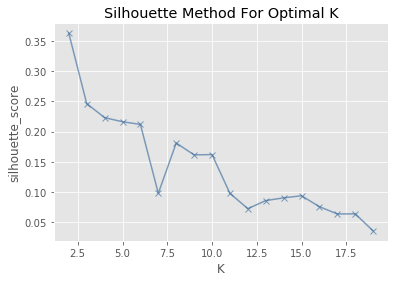

In [54]:
plt.plot(K_sil, sil,'bx-', color = (0.2, 0.4, 0.6, 0.6))

plt.ylabel('silhouette_score')
plt.xlabel('K')
plt.title('Silhouette Method For Optimal K')
plt.show()



### Determine the Optimal K

The Elbow method is not useful, in fact the Silhouette Method clarifies that optimal **K** is 5 (in order to better recognize special features of each district).

# Cluster Neighborhoods

In [55]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Verona_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [56]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Verona_merged = Verona

# merge 
Verona_merged = Verona_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Verona_merged.head()

,CAP,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,37121,Centro,45.44177,10.99624,2,Italian Restaurant,Café,Pizza Place,Trattoria/Osteria,Plaza,Restaurant,Historic Site,Ice Cream Shop,Bar,Hotel
1,37122,Cittadella,45.43526,10.98936,2,Italian Restaurant,Hotel,Wine Bar,Café,Ice Cream Shop,Bar,Restaurant,Pizza Place,Plaza,Theater
2,37123,San Zeno,45.44113,10.98048,2,Italian Restaurant,Pizza Place,Hotel,Restaurant,Cocktail Bar,Indian Restaurant,Wine Bar,Movie Theater,Chinese Restaurant,Snack Place
3,37124,Parona Pindemonte,45.46700,10.96454,0,Fast Food Restaurant,Wine Shop,Food,Church,Electronics Store,Café,Supermarket,Dance Studio,Dessert Shop,Diner
4,37125,Quinzano,45.47207,10.97446,2,Pizza Place,Church,Smoke Shop,Soccer Field,Construction & Landscaping,Cupcake Shop,Dance Studio,Dessert Shop,Diner,Dog Run


# Analize each Cluster

### Cluster 1

In [57]:
Verona_merged.loc[Verona_merged['Cluster Labels'] == 0, Verona_merged.columns[[1] + list(range(5, Verona_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Parona Pindemonte,Fast Food Restaurant,Wine Shop,Food,Church,Electronics Store,Café,Supermarket,Dance Studio,Dessert Shop,Diner
15,Santa Lucia,Café,Pizza Place,Jewelry Store,Sushi Restaurant,Wine Shop,Food,Dance Studio,Dessert Shop,Diner,Dog Run


### Cluster 2

In [58]:
Verona_merged.loc[Verona_merged['Cluster Labels'] == 1, Verona_merged.columns[[1] + list(range(5, Verona_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Valpantena,Construction & Landscaping,Home Service,Cupcake Shop,Soccer Field,Food,Dance Studio,Dessert Shop,Diner,Dog Run,Donut Shop


### Cluster 3

In [59]:
Verona_merged.loc[Verona_merged['Cluster Labels'] == 2, Verona_merged.columns[[1] + list(range(5, Verona_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Centro,Italian Restaurant,Café,Pizza Place,Trattoria/Osteria,Plaza,Restaurant,Historic Site,Ice Cream Shop,Bar,Hotel
1,Cittadella,Italian Restaurant,Hotel,Wine Bar,Café,Ice Cream Shop,Bar,Restaurant,Pizza Place,Plaza,Theater
2,San Zeno,Italian Restaurant,Pizza Place,Hotel,Restaurant,Cocktail Bar,Indian Restaurant,Wine Bar,Movie Theater,Chinese Restaurant,Snack Place
4,Quinzano,Pizza Place,Church,Smoke Shop,Soccer Field,Construction & Landscaping,Cupcake Shop,Dance Studio,Dessert Shop,Diner,Dog Run
5,Borgo Trento,Café,Plaza,Ice Cream Shop,Wine Bar,Pizza Place,Hotel,Italian Restaurant,Trattoria/Osteria,Breakfast Spot,Park
6,Avesa,Italian Restaurant,Pizza Place,Restaurant,Plaza,Wine Shop,Flower Shop,Cupcake Shop,Dance Studio,Dessert Shop,Diner
7,Valdonega,Argentinian Restaurant,Cocktail Bar,Park,Bed & Breakfast,Playground,Wine Shop,Food,Dessert Shop,Diner,Dog Run
8,Veronetta Ponte Pietra,Italian Restaurant,Café,Trattoria/Osteria,Pizza Place,Bar,Restaurant,Wine Bar,Piadineria,Art Gallery,Plaza
9,Borgo Venezia Santa Croce,Pizza Place,Chinese Restaurant,Café,Ice Cream Shop,Smoke Shop,Wine Bar,Food & Drink Shop,Multiplex,Dog Run,Park
10,San Michele,Pizza Place,Café,Pool,Supermarket,Pub,Restaurant,Gym / Fitness Center,Wine Bar,Falafel Restaurant,Dance Studio


### Cluster 4

In [60]:
Verona_merged.loc[Verona_merged['Cluster Labels'] == 3, Verona_merged.columns[[1] + list(range(5, Verona_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Porto San Pancrazio,Bakery,Bar,Train Station,Grocery Store,Electronics Store,Flower Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Wine Shop


### Cluster 5

In [61]:
Verona_merged.loc[Verona_merged['Cluster Labels'] == 4, Verona_merged.columns[[1] + list(range(5, Verona_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Montorio,Italian Restaurant,Locksmith,Wine Shop,Food & Drink Shop,Dance Studio,Dessert Shop,Diner,Dog Run,Donut Shop,Electronics Store


# Map Clusters

In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Verona_merged['Latitude'], Verona_merged['Longitude'], Verona_merged['Neighborhood'], Verona_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Plot number of venues for each cluster to determine labels

In [63]:
Verona_final = Verona_merged[['Cluster Labels', '1st Most Common Venue']]
Verona_final.head()

,Cluster Labels,1st Most Common Venue
0,2,Italian Restaurant
1,2,Italian Restaurant
2,2,Italian Restaurant
3,0,Fast Food Restaurant
4,2,Pizza Place


In [64]:
Verona_finale = Verona_final.set_index('Cluster Labels')
Verona_fina = Verona_finale.sort_values(by = 'Cluster Labels')

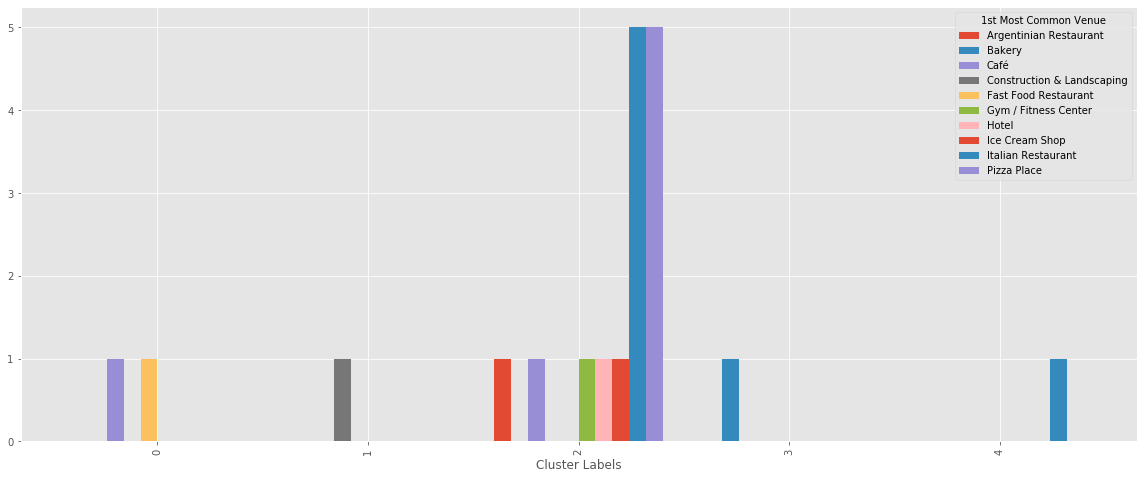

In [65]:
df=Verona_fina.groupby(['Cluster Labels','1st Most Common Venue']).size()
df=df.unstack()
ax = df.plot(kind='bar', figsize=(20, 8), width=0.8)


    
plt.show()



### Plot Price distribution over districts

In [66]:
data_hist = data[['Neighborhood', 'Price']]
data_hist = data_hist.set_index('Neighborhood')

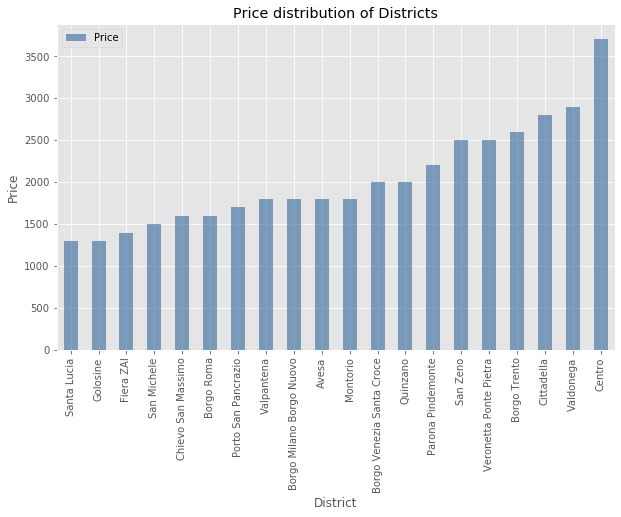

In [67]:
data_hist.sort_values('Price',inplace=True, ascending=True)

data_hist.plot(kind='bar', figsize=(10, 6), color = (0.2, 0.4, 0.6, 0.6))
 
plt.xlabel('District') # add to x-label to the plot
plt.ylabel('Price') # add y-label to the plot
plt.title('Price distribution of Districts') # add title to the plot
 
plt.show()

### Labelling each Borough

In [68]:
Verona_merged['Level Price'] = data['Price_binned_val']
Verona_merged

,CAP,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Level Price
0,37121,Centro,45.44177,10.99624,2,Italian Restaurant,Café,Pizza Place,Trattoria/Osteria,Plaza,Restaurant,Historic Site,Ice Cream Shop,Bar,Hotel,Very High
1,37122,Cittadella,45.43526,10.98936,2,Italian Restaurant,Hotel,Wine Bar,Café,Ice Cream Shop,Bar,Restaurant,Pizza Place,Plaza,Theater,High
2,37123,San Zeno,45.44113,10.98048,2,Italian Restaurant,Pizza Place,Hotel,Restaurant,Cocktail Bar,Indian Restaurant,Wine Bar,Movie Theater,Chinese Restaurant,Snack Place,Medium
3,37124,Parona Pindemonte,45.46700,10.96454,0,Fast Food Restaurant,Wine Shop,Food,Church,Electronics Store,Café,Supermarket,Dance Studio,Dessert Shop,Diner,Low
4,37125,Quinzano,45.47207,10.97446,2,Pizza Place,Church,Smoke Shop,Soccer Field,Construction & Landscaping,Cupcake Shop,Dance Studio,Dessert Shop,Diner,Dog Run,Low
5,37126,Borgo Trento,45.44873,10.98823,2,Café,Plaza,Ice Cream Shop,Wine Bar,Pizza Place,Hotel,Italian Restaurant,Trattoria/Osteria,Breakfast Spot,Park,Medium
6,37127,Avesa,45.47469,10.98902,2,Italian Restaurant,Pizza Place,Restaurant,Plaza,Wine Shop,Flower Shop,Cupcake Shop,Dance Studio,Dessert Shop,Diner,Low
7,37128,Valdonega,45.45665,10.99970,2,Argentinian Restaurant,Cocktail Bar,Park,Bed & Breakfast,Playground,Wine Shop,Food,Dessert Shop,Diner,Dog Run,High
8,37129,Veronetta Ponte Pietra,45.44232,11.00559,2,Italian Restaurant,Café,Trattoria/Osteria,Pizza Place,Bar,Restaurant,Wine Bar,Piadineria,Art Gallery,Plaza,Medium
9,37131,Borgo Venezia Santa Croce,45.44478,11.02308,2,Pizza Place,Chinese Restaurant,Café,Ice Cream Shop,Smoke Shop,Wine Bar,Food & Drink Shop,Multiplex,Dog Run,Park,Low


### Labelling each Cluster 

In [69]:
Classy = pd.DataFrame({"Classify": ['Residential & Multiple social venues','Residential & Multiple social venues','Residential & Multiple social venues','Residential, food and wine','Residential, food and wine','Residential & Multiple social venues','Residential & Multiple social venues','Residential & Multiple social venues','Residential & Multiple social venues','Residential & Multiple social venues','Residential & Multiple social venues','Bar venues','Residential & Multiple social venues','Residential & Multiple social venues','Residential & Multiple social venues','Residential, food and wine','Residential & Multiple social venues' ,'Residential & Multiple social venues','Restaurant & residential venues','Construction & Landscaping']})
Verona_merged["Classify"] = Classy["Classify"]
Verona_merged.head()

,CAP,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Level Price,Classify
0,37121,Centro,45.44177,10.99624,2,Italian Restaurant,Café,Pizza Place,Trattoria/Osteria,Plaza,Restaurant,Historic Site,Ice Cream Shop,Bar,Hotel,Very High,Residential & Multiple social venues
1,37122,Cittadella,45.43526,10.98936,2,Italian Restaurant,Hotel,Wine Bar,Café,Ice Cream Shop,Bar,Restaurant,Pizza Place,Plaza,Theater,High,Residential & Multiple social venues
2,37123,San Zeno,45.44113,10.98048,2,Italian Restaurant,Pizza Place,Hotel,Restaurant,Cocktail Bar,Indian Restaurant,Wine Bar,Movie Theater,Chinese Restaurant,Snack Place,Medium,Residential & Multiple social venues
3,37124,Parona Pindemonte,45.46700,10.96454,0,Fast Food Restaurant,Wine Shop,Food,Church,Electronics Store,Café,Supermarket,Dance Studio,Dessert Shop,Diner,Low,"Residential, food and wine"
4,37125,Quinzano,45.47207,10.97446,2,Pizza Place,Church,Smoke Shop,Soccer Field,Construction & Landscaping,Cupcake Shop,Dance Studio,Dessert Shop,Diner,Dog Run,Low,"Residential, food and wine"


# Plot map of KClusters

In [70]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, price, classify in zip(Verona_merged['Latitude'], Verona_merged['Longitude'], Verona_merged['Neighborhood'], Verona_merged['Cluster Labels'], Verona_merged['Level Price'], Verona_merged['Classify']):
    label = folium.Popup(str(poi) + " " + "/" + ' Cluster ' + str(classify) + " " + "/" + ' Price Level ' + str(price),  parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Choropleth and folium map with KClusters

In [71]:
data['CAP'] = data['CAP'].astype(str)
data

,CAP,Neighborhood,Latitude,Longitude,Price,NTN,IMI,GdA,Trend Eval,Perception,Price_binned,Price_binned_val
0,37121,Centro,45.44177,10.99624,3700.0,0.041,0.0210,0.07,0.332,5,5,Very High
1,37122,Cittadella,45.43526,10.98936,2800.0,0.177,0.0247,0.07,0.281,5,4,High
2,37123,San Zeno,45.44113,10.98048,2500.0,0.177,0.0247,0.07,0.115,4,3,Medium
3,37124,Parona Pindemonte,45.46700,10.96454,2200.0,0.061,0.0248,0.07,0.025,3,2,Low
4,37125,Quinzano,45.47207,10.97446,2000.0,0.115,0.0205,0.07,-0.031,3,2,Low
5,37126,Borgo Trento,45.44873,10.98823,2600.0,-0.021,0.0248,0.07,0.045,4,3,Medium
6,37127,Avesa,45.47469,10.98902,1800.0,0.115,0.0205,0.07,-0.276,3,2,Low
7,37128,Valdonega,45.45665,10.99970,2900.0,-0.032,0.0248,0.07,0.021,4,4,High
8,37129,Veronetta Ponte Pietra,45.44232,11.00559,2500.0,-0.239,0.0227,0.07,0.185,4,3,Medium
9,37131,Borgo Venezia Santa Croce,45.44478,11.02308,2000.0,-0.061,0.0246,0.07,0.142,3,2,Low


In [72]:
data.dtypes

CAP                   object
Neighborhood          object
Latitude             float64
Longitude            float64
Price                float64
NTN                  float64
IMI                  float64
GdA                  float64
Trend Eval           float64
Perception             int64
Price_binned        category
Price_binned_val    category
dtype: object

In [73]:
!conda install -n conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')


EnvironmentLocationNotFound: Not a conda environment: /home/jupyterlab/conda/envs/conda-forge

Folium installed and imported!


In [74]:
#!conda update -n base -c defaults conda --yes

In [75]:
#!conda install -c anaconda xlrd --yes

In [76]:
world_geo = r'convert.json' # geojson file

# create a plain map
world_map = folium.Map(location=[45.438158, 10.993742], zoom_start=13, tiles='openstreetmap')
world_map

In [77]:
world_map.choropleth(
    geo_data=world_geo,
    data=data,
    columns=['CAP', 'Price'],
    key_on='feature.properties.ID',
    fill_color= 'PuBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Price'
)

folium.LayerControl().add_to(world_map)

# display map
world_map

In [78]:
# create map
map_clusters = world_map

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, price, classify in zip(Verona_merged['Latitude'], Verona_merged['Longitude'], Verona_merged['Neighborhood'], Verona_merged['Cluster Labels'], Verona_merged['Level Price'], Verona_merged['Classify']):
    label = folium.Popup(str(poi) + " " + "/" + ' Cluster ' + str(classify) + " " + "/" + ' Price Level ' + str(price),  parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 2. Stat Section

In [79]:
import pandas as pd
import numpy as np
from numpy import inf
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt

### Import Master Data

In [80]:
data = pd.read_csv('MasterData_R.csv', sep=';')
data

,CAP,Neighborhood,Latitude,Longitude,Price,NTN,IMI,GdA,Trend Eval,Perception
0,37121,Centro,45.44177,10.99624,3700.0,0.041,0.0210,0.07,0.332,5
1,37122,Cittadella,45.43526,10.98936,2800.0,0.177,0.0247,0.07,0.281,5
2,37123,San Zeno,45.44113,10.98048,2500.0,0.177,0.0247,0.07,0.115,4
3,37124,Parona Pindemonte,45.46700,10.96454,2200.0,0.061,0.0248,0.07,0.025,3
4,37125,Quinzano,45.47207,10.97446,2000.0,0.115,0.0205,0.07,-0.031,3
5,37126,Borgo Trento,45.44873,10.98823,2600.0,-0.021,0.0248,0.07,0.045,4
6,37127,Avesa,45.47469,10.98902,1800.0,0.115,0.0205,0.07,-0.276,3
7,37128,Valdonega,45.45665,10.99970,2900.0,-0.032,0.0248,0.07,0.021,4
8,37129,Veronetta Ponte Pietra,45.44232,11.00559,2500.0,-0.239,0.0227,0.07,0.185,4
9,37131,Borgo Venezia Santa Croce,45.44478,11.02308,2000.0,-0.061,0.0246,0.07,0.142,3


### Describe Master Data

In [81]:
data.describe().round(3)

,CAP,Latitude,Longitude,Price,NTN,IMI,GdA,Trend Eval,Perception
count,20.000,20.000,20.000,20.000,20.000,20.000,20.00,20.000,20.00
mean,37131.150,45.444,10.993,2040.000,0.059,0.024,0.07,0.041,2.90
std,6.523,0.023,0.032,622.727,0.107,0.002,0.00,0.136,1.21
min,37121.000,45.398,10.934,1300.000,-0.239,0.020,0.07,-0.276,1.00
25%,37125.750,45.431,10.973,1600.000,-0.024,0.022,0.07,-0.038,2.00
50%,37131.500,45.443,10.989,1800.000,0.086,0.025,0.07,0.023,3.00
75%,37136.250,45.459,11.009,2500.000,0.115,0.025,0.07,0.100,4.00
max,37142.000,45.487,11.068,3700.000,0.243,0.029,0.07,0.332,5.00


In [82]:
data.sort_values(by='Price', ascending=False)

,CAP,Neighborhood,Latitude,Longitude,Price,NTN,IMI,GdA,Trend Eval,Perception
0,37121,Centro,45.44177,10.99624,3700.0,0.041,0.0210,0.07,0.332,5
7,37128,Valdonega,45.45665,10.99970,2900.0,-0.032,0.0248,0.07,0.021,4
1,37122,Cittadella,45.43526,10.98936,2800.0,0.177,0.0247,0.07,0.281,5
5,37126,Borgo Trento,45.44873,10.98823,2600.0,-0.021,0.0248,0.07,0.045,4
2,37123,San Zeno,45.44113,10.98048,2500.0,0.177,0.0247,0.07,0.115,4
8,37129,Veronetta Ponte Pietra,45.44232,11.00559,2500.0,-0.239,0.0227,0.07,0.185,4
3,37124,Parona Pindemonte,45.46700,10.96454,2200.0,0.061,0.0248,0.07,0.025,3
4,37125,Quinzano,45.47207,10.97446,2000.0,0.115,0.0205,0.07,-0.031,3
9,37131,Borgo Venezia Santa Croce,45.44478,11.02308,2000.0,-0.061,0.0246,0.07,0.142,3
16,37138,Borgo Milano Borgo Nuovo,45.44273,10.96692,1800.0,0.106,0.0260,0.07,0.095,2


### Standardization of Price

In [83]:
price_array = np.array(data['Price'])
normalized_Price = preprocessing.normalize([price_array])

In [84]:
print(normalized_Price)


[[0.38872066 0.29416699 0.2626491  0.2311312  0.21011928 0.27315506
  0.18910735 0.30467295 0.2626491  0.21011928 0.15758946 0.17860139
  0.16809542 0.14708349 0.13657753 0.13657753 0.18910735 0.16809542
  0.18910735 0.18910735]]


In [85]:
Price_n = pd.DataFrame(normalized_Price)
Price_n = Price_n.transpose()
Price_n.columns = ["Price"]
Price_n

,Price
0,0.388721
1,0.294167
2,0.262649
3,0.231131
4,0.210119
5,0.273155
6,0.189107
7,0.304673
8,0.262649
9,0.210119


In [86]:
data.update(Price_n)
data

,CAP,Neighborhood,Latitude,Longitude,Price,NTN,IMI,GdA,Trend Eval,Perception
0,37121,Centro,45.44177,10.99624,0.388721,0.041,0.0210,0.07,0.332,5
1,37122,Cittadella,45.43526,10.98936,0.294167,0.177,0.0247,0.07,0.281,5
2,37123,San Zeno,45.44113,10.98048,0.262649,0.177,0.0247,0.07,0.115,4
3,37124,Parona Pindemonte,45.46700,10.96454,0.231131,0.061,0.0248,0.07,0.025,3
4,37125,Quinzano,45.47207,10.97446,0.210119,0.115,0.0205,0.07,-0.031,3
5,37126,Borgo Trento,45.44873,10.98823,0.273155,-0.021,0.0248,0.07,0.045,4
6,37127,Avesa,45.47469,10.98902,0.189107,0.115,0.0205,0.07,-0.276,3
7,37128,Valdonega,45.45665,10.99970,0.304673,-0.032,0.0248,0.07,0.021,4
8,37129,Veronetta Ponte Pietra,45.44232,11.00559,0.262649,-0.239,0.0227,0.07,0.185,4
9,37131,Borgo Venezia Santa Croce,45.44478,11.02308,0.210119,-0.061,0.0246,0.07,0.142,3


### Binning Price and Trend of Price in Master Data

In [87]:
bins= np.linspace(min(data['Price']),max(data['Price']), 6)
group_names= ['1', '2', '3', '4', '5']

data['Price_binned']=pd.cut(data['Price'], bins, labels=group_names, include_lowest=True)

In [88]:
#bins= np.linspace(min(data['Perception']),max(data['Perception']), 6)
#group_names= ['Very Low', 'Low', 'Medium', 'High', 'Very High']

#data['Perception_binned']=pd.cut(data['Perception'], bins, labels=group_names, include_lowest=True)

In [89]:
bins= np.linspace(min(data['Trend Eval']),max(data['Trend Eval']), 6)
group_names= ['1', '2', '3', '4', '5']

data['Trend_binned']=pd.cut(data['Trend Eval'], bins, labels=group_names, include_lowest=True)

In [90]:
data

,CAP,Neighborhood,Latitude,Longitude,Price,NTN,IMI,GdA,Trend Eval,Perception,Price_binned,Trend_binned
0,37121,Centro,45.44177,10.99624,0.388721,0.041,0.0210,0.07,0.332,5,5,5
1,37122,Cittadella,45.43526,10.98936,0.294167,0.177,0.0247,0.07,0.281,5,4,5
2,37123,San Zeno,45.44113,10.98048,0.262649,0.177,0.0247,0.07,0.115,4,3,4
3,37124,Parona Pindemonte,45.46700,10.96454,0.231131,0.061,0.0248,0.07,0.025,3,2,3
4,37125,Quinzano,45.47207,10.97446,0.210119,0.115,0.0205,0.07,-0.031,3,2,3
5,37126,Borgo Trento,45.44873,10.98823,0.273155,-0.021,0.0248,0.07,0.045,4,3,3
6,37127,Avesa,45.47469,10.98902,0.189107,0.115,0.0205,0.07,-0.276,3,2,1
7,37128,Valdonega,45.45665,10.99970,0.304673,-0.032,0.0248,0.07,0.021,4,4,3
8,37129,Veronetta Ponte Pietra,45.44232,11.00559,0.262649,-0.239,0.0227,0.07,0.185,4,3,4
9,37131,Borgo Venezia Santa Croce,45.44478,11.02308,0.210119,-0.061,0.0246,0.07,0.142,3,2,4


In [91]:
data['Price_binned']=data['Price_binned'].astype(int)

In [92]:
#data['Perception']=data['Perception'].astype(int)

In [93]:
data['Trend_binned']=data['Trend_binned'].astype(int)

### Matrix correlation and regression plot

In [112]:
data_cleancorr = data[['Price', 'NTN', 'IMI', 'GdA', 'Trend Eval', 'Perception', 'Index_sell']]
data_cleancorr.corr().round(3)

,Price,NTN,IMI,GdA,Trend Eval,Perception,Index_sell
Price,1.000,-0.293,-0.149,0.0,0.668,0.886,-0.477
NTN,-0.293,1.000,0.398,0.0,-0.200,-0.358,0.382
IMI,-0.149,0.398,1.000,0.0,0.080,-0.348,0.562
GdA,0.000,0.000,0.000,1.0,0.000,0.000,-0.000
Trend Eval,0.668,-0.200,0.080,0.0,1.000,0.595,0.012
Perception,0.886,-0.358,-0.348,0.0,0.595,1.000,-0.733
Index_sell,-0.477,0.382,0.562,-0.0,0.012,-0.733,1.000


In [113]:
pearson_coef, p_value = stats.pearsonr(data[('Trend Eval')], data[('Perception')])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.5945266638648316  with a P-value of P =  0.005698811660341804


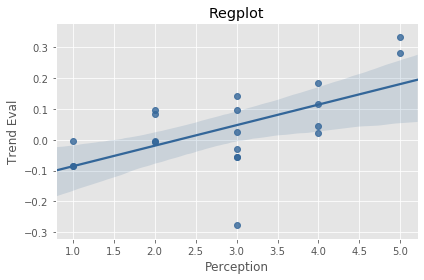

In [114]:
ax = sns.regplot(x='Perception', y='Trend Eval', data = data, color = (0.2, 0.4, 0.6, 0.6))

plt.title('Regplot')

plt.xlabel('Perception')

plt.ylabel('Trend Eval')

plt.tight_layout()

plt.show()

In [115]:
# ANOVA
f_val, p_val = stats.f_oneway(data[('Perception')], data[('Trend Eval')])
print( "ANOVA results: F=", f_val.round(3), ", P =", p_val)   

ANOVA results: F= 110.366 , P = 8.517501110019728e-13


Given that results of this measures I decided to create a simple index, calculated by the ratio of Trend Price and Perception. It shows if the districts have over-performed or not.

### Calculate Index of District performance

In [116]:
data['Index_sell'] = (data['Trend_binned'] / data['Perception']) 
#Index_sell dimostra quanto la percezione rispecchia il trend: 1 dimostra la coincidenza, < 1 dimostra che 
#la percezione è sovraordinata al trend e infine se >1 dimostra che il trend ha sovraperformato la percezione

In [117]:
data

,CAP,Neighborhood,Latitude,Longitude,Price,NTN,IMI,GdA,Trend Eval,Perception,Price_binned,Trend_binned,Index_sell
0,37121,Centro,45.44177,10.99624,0.388721,0.041,0.0210,0.07,0.332,5,5,5,1.000000
1,37122,Cittadella,45.43526,10.98936,0.294167,0.177,0.0247,0.07,0.281,5,4,5,1.000000
2,37123,San Zeno,45.44113,10.98048,0.262649,0.177,0.0247,0.07,0.115,4,3,4,1.000000
3,37124,Parona Pindemonte,45.46700,10.96454,0.231131,0.061,0.0248,0.07,0.025,3,2,3,1.000000
4,37125,Quinzano,45.47207,10.97446,0.210119,0.115,0.0205,0.07,-0.031,3,2,3,1.000000
5,37126,Borgo Trento,45.44873,10.98823,0.273155,-0.021,0.0248,0.07,0.045,4,3,3,0.750000
6,37127,Avesa,45.47469,10.98902,0.189107,0.115,0.0205,0.07,-0.276,3,2,1,0.333333
7,37128,Valdonega,45.45665,10.99970,0.304673,-0.032,0.0248,0.07,0.021,4,4,3,0.750000
8,37129,Veronetta Ponte Pietra,45.44232,11.00559,0.262649,-0.239,0.0227,0.07,0.185,4,3,4,1.000000
9,37131,Borgo Venezia Santa Croce,45.44478,11.02308,0.210119,-0.061,0.0246,0.07,0.142,3,2,4,1.333333


In [118]:
data['Index_sell'] = data['Index_sell'].replace(np.inf, 0)
data['Index_sell']

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     0.750000
6     0.333333
7     0.750000
8     1.000000
9     1.333333
10    1.500000
11    1.500000
12    3.000000
13    2.000000
14    2.000000
15    1.500000
16    2.000000
17    1.333333
18    0.666667
19    0.666667
Name: Index_sell, dtype: float64

In [119]:
data.sort_values(by='Index_sell', ascending=False)

,CAP,Neighborhood,Latitude,Longitude,Price,NTN,IMI,GdA,Trend Eval,Perception,Price_binned,Trend_binned,Index_sell
12,37134,Borgo Roma,45.40904,11.00096,0.168095,0.115,0.0248,0.07,-0.005,1,1,3,3.000000
16,37138,Borgo Milano Borgo Nuovo,45.44273,10.96692,0.189107,0.106,0.0260,0.07,0.095,2,2,4,2.000000
14,37136,Golosine,45.41670,10.96459,0.136578,0.120,0.0251,0.07,-0.085,1,1,2,2.000000
13,37135,Fiera ZAI,45.39826,10.98533,0.147083,0.243,0.0292,0.07,-0.085,1,1,2,2.000000
10,37132,San Michele,45.42980,11.04806,0.157589,0.065,0.0227,0.07,-0.007,2,1,3,1.500000
15,37137,Santa Lucia,45.41913,10.94856,0.136578,0.112,0.0251,0.07,-0.005,2,1,3,1.500000
11,37133,Porto San Pancrazio,45.43180,11.01760,0.178601,0.083,0.0227,0.07,0.085,2,1,3,1.500000
17,37139,Chievo San Massimo,45.44647,10.93405,0.168095,0.088,0.0220,0.07,0.095,3,1,4,1.333333
9,37131,Borgo Venezia Santa Croce,45.44478,11.02308,0.210119,-0.061,0.0246,0.07,0.142,3,2,4,1.333333
1,37122,Cittadella,45.43526,10.98936,0.294167,0.177,0.0247,0.07,0.281,5,4,5,1.000000


In [120]:
data.dtypes

CAP              object
Neighborhood     object
Latitude        float64
Longitude       float64
Price           float64
NTN             float64
IMI             float64
GdA             float64
Trend Eval      float64
Perception        int64
Price_binned      int64
Trend_binned      int64
Index_sell      float64
dtype: object

In [121]:
data['CAP'] = data['CAP'].astype(str)
data

,CAP,Neighborhood,Latitude,Longitude,Price,NTN,IMI,GdA,Trend Eval,Perception,Price_binned,Trend_binned,Index_sell
0,37121,Centro,45.44177,10.99624,0.388721,0.041,0.0210,0.07,0.332,5,5,5,1.000000
1,37122,Cittadella,45.43526,10.98936,0.294167,0.177,0.0247,0.07,0.281,5,4,5,1.000000
2,37123,San Zeno,45.44113,10.98048,0.262649,0.177,0.0247,0.07,0.115,4,3,4,1.000000
3,37124,Parona Pindemonte,45.46700,10.96454,0.231131,0.061,0.0248,0.07,0.025,3,2,3,1.000000
4,37125,Quinzano,45.47207,10.97446,0.210119,0.115,0.0205,0.07,-0.031,3,2,3,1.000000
5,37126,Borgo Trento,45.44873,10.98823,0.273155,-0.021,0.0248,0.07,0.045,4,3,3,0.750000
6,37127,Avesa,45.47469,10.98902,0.189107,0.115,0.0205,0.07,-0.276,3,2,1,0.333333
7,37128,Valdonega,45.45665,10.99970,0.304673,-0.032,0.0248,0.07,0.021,4,4,3,0.750000
8,37129,Veronetta Ponte Pietra,45.44232,11.00559,0.262649,-0.239,0.0227,0.07,0.185,4,3,4,1.000000
9,37131,Borgo Venezia Santa Croce,45.44478,11.02308,0.210119,-0.061,0.0246,0.07,0.142,3,2,4,1.333333


### Plot Choropleth map of Index

In [122]:
!conda install -n conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')


EnvironmentLocationNotFound: Not a conda environment: /home/jupyterlab/conda/envs/conda-forge

Folium installed and imported!


In [123]:
world_geo = r'convert.json' # geojson file

# create a plain map
world_map = folium.Map(location=[45.438158, 10.993742], zoom_start=13, tiles='openstreetmap')
world_map

In [124]:
world_map.choropleth(
    geo_data=world_geo,
    data=data,
    columns=['CAP', 'Index_sell'],
    key_on='feature.properties.ID',
    fill_color= 'PuBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Index_sell'
)

folium.LayerControl().add_to(world_map)

# display map
world_map

### Plot Choropleth map of Price

In [125]:
world_geo = r'convert.json' # geojson file

# create a plain map
world_map = folium.Map(location=[45.438158, 10.993742], zoom_start=13, tiles='openstreetmap')
world_map

In [126]:
world_map.choropleth(
    geo_data=world_geo,
    data=data,
    columns=['CAP', 'Price'],
    key_on='feature.properties.ID',
    fill_color= 'PuBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Price'
)

folium.LayerControl().add_to(world_map)

# display map
world_map